In [44]:
import pandas as pd
import numpy as np
import datetime as dt
import time as tm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [5]:
dtypes_auc = { "auction_type_id": np.float16, "country": "category", "platform": "category", "ref_type_id": "category", 
               "source_id": "category" }

dtypes_clk = { "advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "country_code": "category", 
               "latitude": np.float16, "longitude": np.float16, "wifi_connection": "category", "carrier_id": np.float16,
               "trans_id": "object", "os_major":np.float32, "brand": np.float16, "touchX": np.float16,
               "touchY": np.float16  }

In [6]:
%%time
df_auc = pd.read_csv('auctions.csv.gzip', compression='gzip', dtype=dtypes_auc)


CPU times: user 23.5 s, sys: 1.72 s, total: 25.2 s
Wall time: 24.6 s


In [9]:
%%time
df_clk = pd.read_csv( "clicks.csv.gzip", compression='gzip',dtype = dtypes_clk )

CPU times: user 150 ms, sys: 3.27 ms, total: 154 ms
Wall time: 153 ms


In [10]:
df_auc.head().T

,0,1,2,3,4
auction_type_id,NaN,NaN,NaN,NaN,NaN
country,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
date,2019-03-11 14:18:33.290763,2019-03-11 14:18:34.440157,2019-03-11 14:18:35.862360,2019-03-11 14:18:36.167163,2019-03-11 14:18:37.728590
device_id,6059599345986491085,1115994996230693426,7463856250762200923,7829815350267792040,1448534231953777480
platform,1,1,1,1,1
ref_type_id,1,1,1,1,1
source_id,0,0,0,0,0


In [11]:
df_auc['date'].isnull().sum()

0

In [12]:
df_auc['date'] = pd.to_datetime(df_auc['date'])

In [13]:
df_auc['device_id'].value_counts().head()

633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
Name: device_id, dtype: int64

In [14]:
lista_pop=df_auc['device_id'].value_counts().head().index
lista_pop

Int64Index([ 633139769114048761, 7202276635029175071, 7298861376107043945,
            6302840482782120473, 5376802567578262905],
           dtype='int64')

In [15]:
df_auc_pop=df_auc.loc[df_auc['device_id'].isin(lista_pop), ['device_id','date']]
df_auc_pop['device_id'].value_counts()

633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
Name: device_id, dtype: int64

In [16]:
df_auc_pop['fecha']=df_auc_pop['date'].dt.date
df_auc_pop['fecha'].value_counts().index

Index([2019-03-13, 2019-03-10, 2019-03-11, 2019-03-12, 2019-03-09, 2019-03-08,
       2019-03-07, 2019-03-05, 2019-03-06],
      dtype='object')

In [17]:
df_auc_pop.sort_values(by = 'fecha',inplace=True)
df_auc_pop

,device_id,date,fecha
9138537,7202276635029175071,2019-03-05 04:21:40.231109,2019-03-05
15095039,633139769114048761,2019-03-05 08:49:51.801099,2019-03-05
15095165,633139769114048761,2019-03-05 08:54:00.377740,2019-03-05
15095166,633139769114048761,2019-03-05 08:54:01.624315,2019-03-05
15095170,633139769114048761,2019-03-05 08:54:03.714727,2019-03-05
15095397,633139769114048761,2019-03-05 08:52:09.760594,2019-03-05
15095438,633139769114048761,2019-03-05 08:54:01.814039,2019-03-05
15095830,633139769114048761,2019-03-05 08:17:40.591141,2019-03-05
15095833,633139769114048761,2019-03-05 08:17:45.107133,2019-03-05
15095911,633139769114048761,2019-03-05 08:20:00.566205,2019-03-05


In [36]:
grupo = df_auc_pop.groupby(['device_id','fecha'])['fecha'].count()
grupo.unstack(0)

device_id,633139769114048761,5376802567578262905,6302840482782120473,7202276635029175071,7298861376107043945
fecha,,,,,
2019-03-05,2255,122,4,875,640
2019-03-06,224,121,28,512,1251
2019-03-07,1877,1053,2191,2933,1316
2019-03-08,1865,2227,2233,2949,1903
2019-03-09,2054,1942,2798,2676,1952
2019-03-10,5777,3315,3623,3414,1459
2019-03-11,4829,2272,792,3157,3345
2019-03-12,4625,1902,1689,2217,2757
2019-03-13,4256,3413,3042,4322,3565


In [43]:
grupo.unstack(0)[633139769114048761]

fecha
2019-03-05    2255
2019-03-06     224
2019-03-07    1877
2019-03-08    1865
2019-03-09    2054
2019-03-10    5777
2019-03-11    4829
2019-03-12    4625
2019-03-13    4256
Name: 633139769114048761, dtype: int64

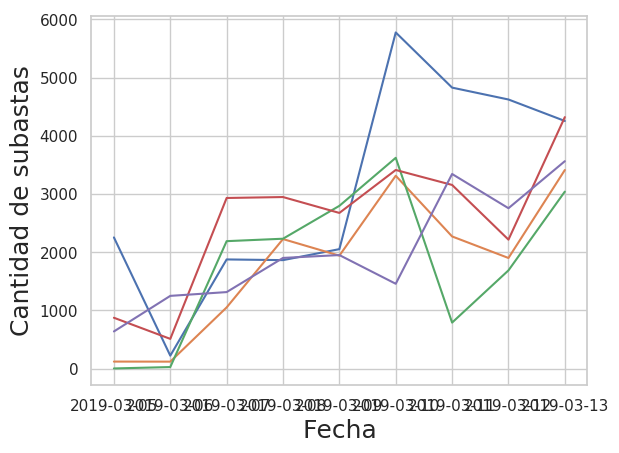

In [19]:
grupo.unstack()
for i in range (grupo.unstack().shape[0]):
    g=sns.lineplot(data = grupo.unstack(0), x=grupo.unstack().columns, y=grupo[grupo.unstack(0).columns[i]])
g.set_xlabel("Fecha",fontsize=18)
g.set_ylabel("Cantidad de subastas", fontsize=18);

In [20]:
grupo_sum = grupo.unstack()

In [21]:
def suma(df,i):
    df[df.columns[i]] = (df[df.columns[i]] + df[df.columns[i-1]])
    return df

for i in range(1 , len(grupo_sum.columns)):
    grupo_sum = suma(grupo_sum,i)
    
grupo_sum = grupo_sum.T

In [22]:
grupo_sum

device_id,633139769114048761,5376802567578262905,6302840482782120473,7202276635029175071,7298861376107043945
fecha,,,,,
2019-03-05,2255,122,4,875,640
2019-03-06,2479,243,32,1387,1891
2019-03-07,4356,1296,2223,4320,3207
2019-03-08,6221,3523,4456,7269,5110
2019-03-09,8275,5465,7254,9945,7062
2019-03-10,14052,8780,10877,13359,8521
2019-03-11,18881,11052,11669,16516,11866
2019-03-12,23506,12954,13358,18733,14623
2019-03-13,27762,16367,16400,23055,18188


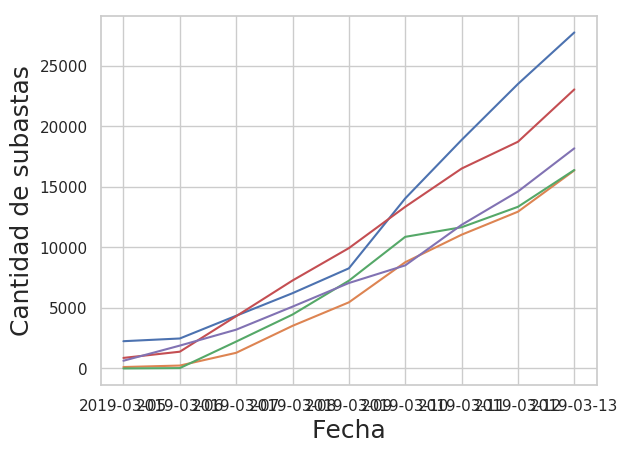

In [23]:
#grupo_sum
for i in range(grupo_sum.shape[1]):
    g=sns.lineplot(data = grupo_sum, x=grupo_sum.T.columns, y=grupo_sum[grupo_sum.columns[i]])
    
g.set_xlabel("Fecha",fontsize=18)
g.set_ylabel("Cantidad de subastas", fontsize=18);

In [24]:
grupo_sum.shape[0]

9

## En qué horario (si es que lo hay) se suele registrar la mayor cantidad de clicks. Armar una visualización que muestre los resultados obtenidos

In [28]:
df_clk.head().T

,0,1,2,3,4
advertiser_id,2,0,0,2,2
action_id,NaN,NaN,NaN,NaN,NaN
source_id,4,0,0,3,3
created,2019-03-06T22:42:12.755Z,2019-03-08T10:24:30.641Z,2019-03-08T15:24:16.069Z,2019-03-06T03:08:51.543Z,2019-03-06T03:32:55.570Z
country_code,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
latitude,1.20605,1.21875,1.20605,1.20605,1.20605
longitude,1.07031,1.07129,1.07031,1.07031,1.07031
wifi_connection,False,False,False,False,False
carrier_id,1,4,6,45,45
trans_id,iGgClCM9exiHF4K31g94XmvHEBSLKIY,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,X5XTOcYQovkl6yadYdAD7xioVGU9jiY


In [30]:
df_clk['created'] = pd.to_datetime(df_clk['created'])
df_clk['hora'] = df_clk['created'].dt.hour
df_clk['hora'].head()

0    22
1    10
2    15
3     3
4     3
Name: hora, dtype: int64

In [44]:
grup_clk = df_clk.groupby('hora')['created'].count()
grup_clk = grup_clk.to_frame().T

In [45]:
grup_clk

hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
created,440,4209,2327,754,1079,945,678,518,537,754,...,834,959,966,641,655,380,389,451,1386,2726


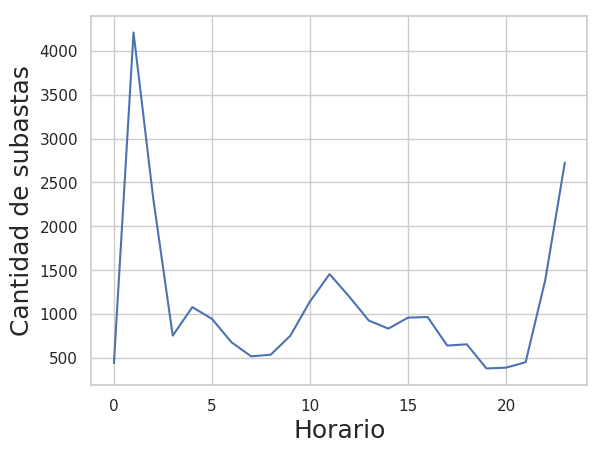

In [47]:
g=sns.lineplot(data = grup_clk.T, x=grup_clk.columns, y=(grup_clk.T)['created'])
g.set_xlabel("Horario",fontsize=18)
g.set_ylabel("Cantidad de subastas", fontsize=18);